https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch

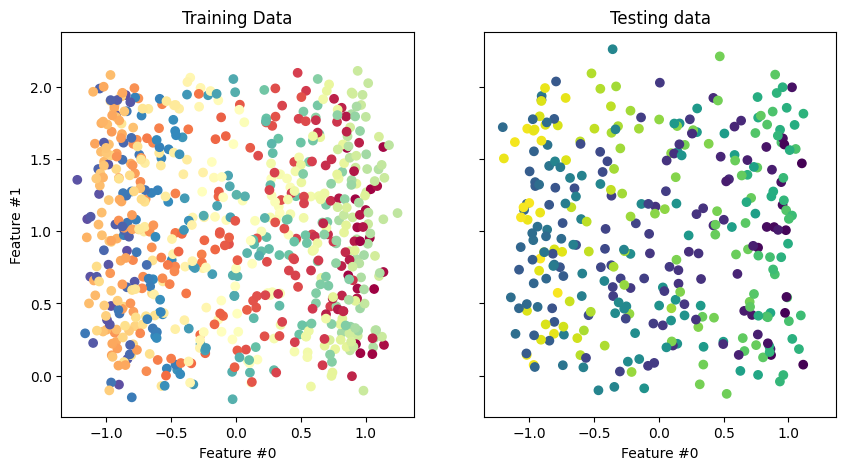

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_s_curve
from sklearn.model_selection import train_test_split

#X, y = make_circles(n_samples=1000, noise=0.1, random_state=26)
#X, y = make_moons(n_samples=1000, noise=0.1, random_state=26)
X, y = make_s_curve(n_samples=1000, noise=0.1, random_state=26)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=26)

fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
train_ax.set_title("Training Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")
plt.show()

In [36]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

batch_size = 64

train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch {batch + 1}:")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break



Batch 1:
X shape: torch.Size([64, 2])
y shape: torch.Size([64])


In [37]:
from torch import nn, optim

input_dim = 2
hidden_dim = 100
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity='relu')
        self.layer_2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))
        return x

model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=1, bias=True)
)


In [38]:
lr = 0.1

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=lr)


In [39]:
from tqdm import tqdm
epochs = 1000
loss_value = []

for epoch in tqdm(range(epochs)):
    for X, y in train_dataloader:
        optimizer.zero_grad()
        
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_value.append(loss.item())
        loss.backward()
        optimizer.step()
print(f"Final loss: {loss_value[-1]:.4f}")

100%|██████████| 1000/1000 [00:06<00:00, 165.59it/s]

Final loss: 0.0217


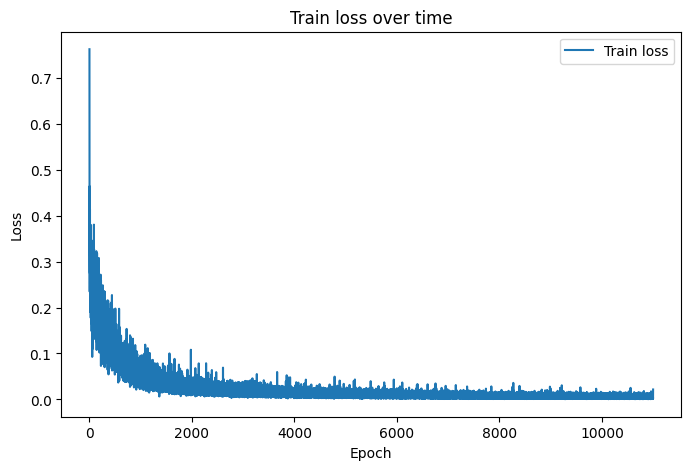

In [40]:
step = range(len(loss_value))

fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(step, np.array(loss_value), label='Train loss')
plt.title("Train loss over time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [41]:
import itertools

y_pred = []
y_test = []
correct = 0
total = 0

with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(list(y.numpy()))
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the 3300 test instances: {100 * correct // total}%')


Accuracy of the network on the 3300 test instances: 100%
